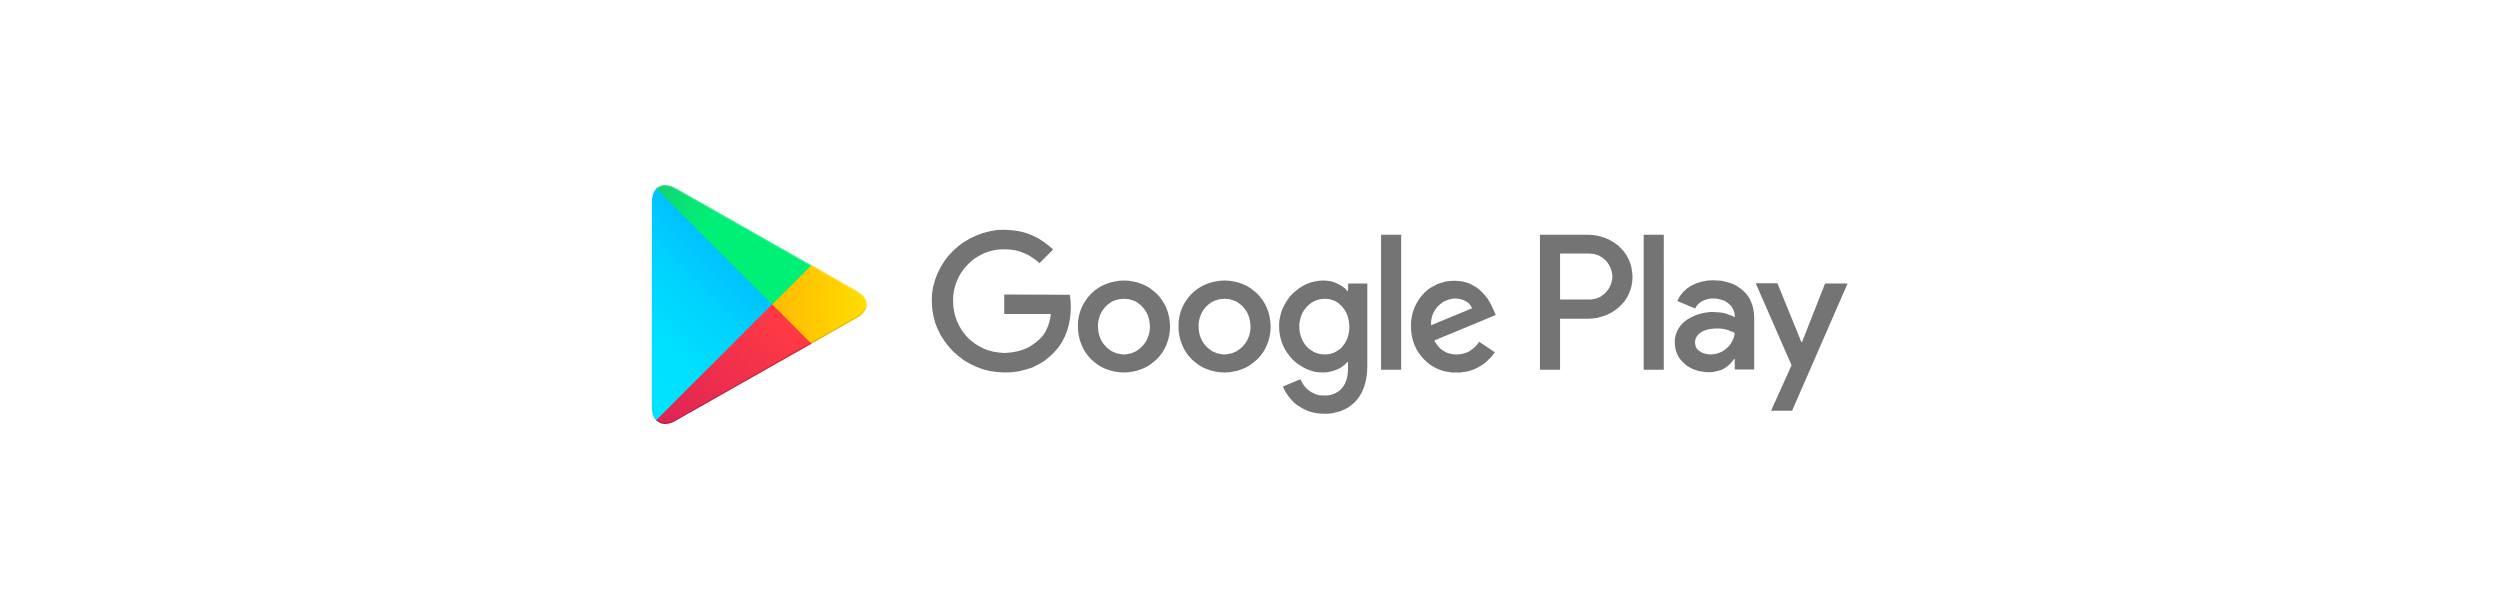

<b> Bu not notebook ile google play store uygulama veri kümesi için EDA ve veri görselleştirmenin nasıl yapılacağı anlatılacaktır.

<b>İçindekiler:</b>
<ul>
<li><a href="#load">Loading the dataset (Veri setini yükleme)</a></li>
    
<li><a href="#understanding">Understanding the dataset(Veri setini anlama)</a></li>
    
<li><a href="#missing">Handling missing data (Kayıp verilerin ele alınması)</a></li>
    
<li><a href="#preprocessing">Data preprocessing (Veri ön işleme)</a></li>
    
<li><a href="#visualization">Data visualization (Veri görselleştirme)</a></li>
    
</ul>

**Faydalı olması temennisiyle**

<a id='understanding'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Import Library</b></p>

- **missingno:** Eksik veri görselleştirme kütüphanesi, eksik veri yapılarını anlamamıza yardımcı olur.
- **plotly.express:** İnteraktif grafikler oluşturmak için kullanılan kütüphane.
- **folium:** Harita üzerinde veri görselleştirmesi yapmak için kullanılan bir kütüphane.
- **folium.plugins:** Folium'un ekstra plugin'lerini kullanmamızı sağlar.

- **plt.rcParams["figure.figsize"] = (6,4):** Matplotlib ile çizilecek olan grafiklerin boyutunu ayarlar. Burada grafiklerin boyutu genişlik olarak 6 inç ve yükseklik olarak 4 inç olarak belirlenmiştir.

- **warnings.filterwarnings("ignore"):** Python uyarılarını görmezden gelmek için kullanılır. Bu sayede kod çalışırken çıkan gereksiz uyarı mesajları engellenir.
- **pd.set_option('display.max_columns', None):** Pandas DataFrame çıktısında sütun sayısını sınırlamaz, tüm sütunları gösterir.
- **pd.set_option('display.max_rows', None):** Pandas DataFrame çıktısında satır sayısını sınırlamaz, tüm satırları gösterir.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
!pip install folium
!pip install missingno

<a id='load'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Loading The Dataset</b></p>

**About the dataset**

İncelediğimiz dataset, Google Play Store'daki uygulamaların çeşitli özelliklerini içeren bir veri setidir. Toplam 10,841 satır ve 13 sütun içerir. 

<ul>
    <li><b>App:</b> Uygulamanın adı</li>
    <li><b>Category:</b> Uygulamanın kategorisi. Örnek kategoriler: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY vb.</li>
    <li><b>Rating:</b> Kullanıcılar tarafından verilen ortalama puan (5 üzerinden)</li>
    <li><b>Reviews:</b> Kullanıcılar tarafından uygulamanın aldığı toplam yorum sayısı.</li>
    <li><b>Size:</b> Uygulamanın boyutu megabayt (MB) cinsinden</li>
    <li><b>Installs:</b> Uygulamanın Google Play'den kaç kez indirildiği bilgisi</li>
    <li><b>Type:</b> Uygulamanın ücretsiz mi yoksa ücretli mi olduğu bilgisi</li>
    <li><b>Price:</b> Uygulamanın fiyatı, Amerikan Doları (USD) cinsinden 0 ücretsiz demek</li>
    <li><b>Content Rating:</b> Uygulamanın içerik derecelendirmesi. Örneğin, "Everyone" herkes için uygun olduğunu gösterir.</li>
    <li><b>Genres:</b> Uygulamanın türü veya alt kategorileri. Örneğin, "Art-Design;Pretend Play" iki farklı türü gösterir.</li>
    <li><b>Last Updated:</b> Uygulamanın en son ne zaman güncellendiği. Örneğin, "January 7, 2018</li>
    <li><b>Current Ver:</b> Uygulamanın mevcut versiyonu. Örneğin, "1.0.0"</li>
    <li><b>Android Ver:</b> Uygulamanın çalıştırılabilmesi için gereken minimum Android versiyonu. Örneğin, "4.0.3 and up"</li>
</ul> 

*******************************************************************

The dataset we are examining contains various properties of applications on the Google Play Store. It includes a total of 10,841 rows and 13 columns.

<ul>
    <li><b>App:</b> The name of the application.</li>
    <li><b>Category:</b> The category of the application. Example categories include ART_AND_DESIGN, FINANCE, COMICS, BEAUTY, etc.</li>
    <li><b>Rating:</b> The average rating given by users (out of 5).</li>
    <li><b>Reviews:</b> The total number of user reviews the application has received.</li>
    <li><b>Size:</b> The size of the application in megabytes (MB).</li>
    <li><b>Installs:</b> The number of times the application has been downloaded from Google Play.</li>
    <li><b>Type:</b> Whether the application is free or paid.</li>
    <li><b>Price:</b> The price of the application, in US Dollars (USD). A price of 0 means it's free.</li>
    <li><b>Content Rating:</b> The content rating of the application. For example, "Everyone" indicates that it is suitable for all ages.</li>
    <li><b>Genres:</b> The genre or sub-categories of the application. For example, "Art & Design;Pretend Play" indicates two different types.</li>
    <li><b>Last Updated:</b> When the application was last updated. For example, "January 7, 2018."</li>
    <li><b>Current Ver:</b> The current version of the application. For example, "1.0.0."</li>
    <li><b>Android Ver:</b> The minimum Android version required to run the application. For example, "4.0.3 and up."</li>
</ul>


In [ ]:
df0 = pd.read_csv('googleplaystore.csv')
df = df0.copy()

In [ ]:
df.head()

In [ ]:
!pip install skimpy

In [ ]:
from skimpy import skim

Skimpy: Veri bilimi ve veri analizi projelerinde sıkça kullanılan Pandas ve Matplotlib gibi kütüphanelerin işlevselliğini genişletmek için tasarlanmıştır.

In [ ]:
skim(df) # genis tablo halinde df ozetini getirir

<a id='understanding'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Understanding the dataset-EDA</b></p>

**info() metodu,** DataFrame hakkında temel bilgileri sağlar. Bu metod, DataFrame'in yapısını hızlı bir şekilde anlamak için kullanışlıdır. 

- **RangeIndex:** İndeksleme hakkında bilgi, örneğin başlangıç, bitiş ve adım boyutu.
- **Data columns:** Tüm sütunların adları, kaç tane non-null (boş olmayan) değer olduğu ve veri tipi (dtype).
- **memory usage:** DataFrame'in hafızada ne kadar yer kapladığı.
- **dtypes:** Farklı veri tiplerinin (örneğin, integer, float, object vb.) kaç tane olduğu.

In [ ]:
df.info()

**df.columns**, sütun adlarını döndüren bir özelliktir. Bu özellik kullanıldığında, DataFrame'deki sütunların isimlerini içeren bir liste elde edilir.

Column isimlerinde boşluk istenmez bu kapsamda bu boşlukları hep kullandığımız underscore (_) ile değiştirmeyi düşünmek uygun olur.

In [ ]:
df.columns

**.str.replace(" ", "_"):** Sütun adları içindeki boşlukları alt çizgi ile değiştirerek sütun adlarını yeniden biçimlendirir.

Daha kullanışlı ve işlenebilir sütun adları elde etmenize yardımcı olur. Bu, sütun adlarını tek bir düzende tutmak ve sütunlara daha kolay erişim sağlamak için yaygın bir uygulamadır.

In [ ]:
df.columns = df.columns.str.replace(" ","_")

In [ ]:
df.columns

**df.shape,** boyut bilgilerini (satır ve sütun sayısı) döndüren bir özelliktir. 

Bu özellik kullanıldığında, dataframe in  kaç satır ve kaç sütundan oluştuğunu gösteren bir tuple elde edilir.

In [ ]:
df.shape

**dtypes özelliği** her bir sütunun veri tipini (dtype) gösterir. 

Bu özellik, DataFrame'inizde hangi türde verilerin olduğunu hızlı bir şekilde anlamanıza yardımcı olur.

In [ ]:
df.dtypes

**duplicated**

- **duplicated** fonksiyonu, bir **pandas DataFrame** içinde yinelenen satırları belirlemek için kullanılır. Bu fonksiyon, her bir satır için yinelenip yinelenmediğini gösteren boolean (True/False) değerler içeren bir **Series** döndürür.
- Fonksiyon, **keep** parametresi ile esneklik sağlar:
  - **keep=first** (varsayılan): İlk yinelenen dışındaki tüm yinelenenleri **True** olarak işaretler.
  - **keep=last**: Son yinelenen dışındaki tüm yinelenenleri **True** olarak işaretler.
  - **keep=False**: Tüm yinelenenleri **True** olarak işaretler.

In [ ]:
df.duplicated().sum()

 **drop_duplicates**

- **drop_duplicates** fonksiyonu, **DataFrame'den yinelenen satırları kaldırmak** için kullanılır. Bu fonksiyon, yinelenen satırlar çıkarıldıktan sonra kalan DataFrame'i döndürür.
- Bu fonksiyon da **keep** parametresi ile kullanılabilir:
  - **keep=first** (varsayılan): İlk yinelenen hariç diğer tüm yinelenenleri kaldırır.
  - **keep=last**: Son yinelenen hariç diğer tüm yinelenenleri kaldırır.
  - **keep=False**: Tüm yinelenen satırları kaldırır, yani her bir benzersiz kombinasyon sadece bir kez görünür.
- **inplace** parametresi, değişikliklerin orijinal DataFrame üzerinde yerinde yapılıp yapılmayacağını belirler (**True** ise yerinde değişiklik yapar, **False** ise orijinal DataFrame'i değiştirmez ve sonucu yeni bir DataFrame olarak döndürür).

In [ ]:
df = df.drop_duplicates()

In [ ]:
pd.DataFrame({'Count': df.count(),
                    'Null': df.isnull().sum(),
                    'Cardinality': df.nunique()}) #ML de onemli

**df.isnull().sum()** kodu, bir pandas DataFrame'de (df olarak adlandırılmış) her bir sütun için eksik (NaN veya None) değerlerin sayısını döndürür.

Bu kod, veri temizliği ve önişleme aşamalarında çok kullanışlıdır, çünkü eksik verilerin hangi sütunlarda olduğunu hızlı bir şekilde görmemizi sağlar.

In [ ]:
df.isnull().sum()

**sns.set_theme():** Seaborn'un varsayılan tema ayarlarını kullanır. Bu, oluşturulan tüm grafiklerin bir tutarlı görünüme sahip olmasını sağlar.

**sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)}):** Bu satır, oluşturulan grafiklerin çözünürlüğünü ve boyutunu ayarlar.

**"figure.dpi": 300:** DPI (dots per inch) ayarını 300 olarak belirler, bu da grafiklerin daha yüksek çözünürlüklü olmasını sağlar.

**"figure.figsize": (12, 9):** Oluşturulan grafiklerin boyutunu 12x9 inç olarak ayarlar.

In [ ]:
sns.set_theme()

sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

In [ ]:
# fig, ax = plt.subplots()
# fig.set_facecolor('#ababab')  # Burada arka plan rengi için bir hex rengi kullandım
# ax.set_facecolor('#eafff5')   # Burada grafik alanının rengi için başka bir hex rengi kullandım

**sns.heatmap(df.isnull(), cbar=False)** kodu, bir DataFrame'de eksik verilerin (NaN veya None) nerede olduğunu görselleştirmek için bir heatmap oluşturur. 

cbar=False parametresi, renk çubuğunun (color bar) gösterilmemesini sağlar.

**Bu ısı haritasında:**

Eksik değerler, beyaz veya açık bir renkle gösterilir.

Diğer değerler, genellikle siyah veya koyu bir renkle gösterilir.

Bu görselleştirme, hangi sütunlarda ve satırlarda eksik verilerin yoğunlaştığını hızlıca görmek için oldukça kullanışlıdır. 

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))  # 6x4 inç boyutunda bir figure oluştur
fig.patch.set_facecolor('lightgray')  # Genel arka plan rengi

ax.tick_params(axis='x', labelsize=8)  # X eksen etiketlerinin boyutu
ax.tick_params(axis='y', labelsize=8)  # Y eksen etiketlerinin boyutu

sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd');

**msno.bar(df);** kodu, missingno kütüphanesini (genellikle msno olarak kısaltılır) kullanarak veri setindeki eksik değerleri bar grafik şeklinde gösterir. 

Her bir bar, bir sütunu temsil eder ve barın yüksekliği, o sütundaki eksik olmayan değerlerin sayısını gösterir.

Bu tür bir görselleştirme, eksik verilerin hangi sütunlarda yoğunlaştığını hızlı bir şekilde anlamanıza yardımcı olabilir. 

Eksik verilerin olduğu sütunlar, veri temizleme veya önişleme aşamalarında özel dikkat gerektirebilir.

In [ ]:
#bar chart olarak görmek için

msno.bar(df);

**Output Açıklaması**

**Yatay Eksen (X Ekseni):** Bu eksen, veri setindeki sütun isimlerini gösterir. Her bir sütun, bir bar ile temsil edilir.

**Dikey Eksen (Y Ekseni):** Bu eksen, her bir sütundaki eksik olmayan değerlerin sayısını gösterir. Eğer bir bar tamamen doluysa, bu o sütunda hiç eksik değer olmadığı anlamına gelir. Eğer bir bar tamamen dolu değilse, eksik değerler olduğu anlamına gelir.

**Barlar:** Her bir bar, bir sütunu temsil eder. Barın yüksekliği, o sütundaki eksik olmayan değerlerin sayısını gösterir. Barın rengi genellikle eksik olmayan değerlerin sayısını görselleştirmek için kullanılır. Tamamen dolu bir bar, o sütunda hiç eksik değer olmadığını gösterir.

**Barlar Üzerindeki Sayılar:** Her bir sütundaki eksik olmayan değerlerin tam sayısını gösterir.

**Grafiğin sağ dış tarafında yer alan sayılar:** Bu sayılar gözlem sayılarını rakamsal olarak göstermektedir.

**Grafiğin sol dış tarafında yer alan sayılar:** Bu sayılar gözlem sayılarını oransal olarak göstermektedir.

**msno.matrix(df);** missingno kütüphanesini kullanarak veri setindeki eksik değerleri bir matris grafiği şeklinde gösterir. 

Bu görselleştirme, veri setindeki eksik değerlerin yapısını anlamak için oldukça yararlıdır.

Bu tür bir görselleştirme, eksik değerlerin hangi sütunlarda ve satırlarda yoğunlaştığını, ayrıca eksik değerlerin veri seti boyunca nasıl dağıldığını görmek için oldukça yararlıdır.

Örneğin, eğer belirli bir sütunda çok fazla eksik değer varsa veya eksik değerler belirli bir desen gösteriyorsa, bu sütun veya desen üzerinde daha fazla çalışma yapmanız gerekebilir.

In [ ]:
# Matrix chart olarak görmek için

msno.matrix(df, color=(0, 0.5, 0), fontsize=18, sparkline=True);

**Yatay Eksen (X Ekseni):** Bu eksen, veri setindeki sütun isimlerini gösterir. Her bir sütun, bir dizi nokta veya çizgi ile temsil edilir.

**Dikey Eksen (Y Ekseni):** Bu eksen, veri setindeki satır indekslerini gösterir. Her bir satır, yatay eksende belirtilen sütunlardaki değerlerin var olup olmadığına göre bir dizi nokta veya çizgi ile temsil edilir.

**Noktalar ve Çizgiler:** Eğer bir değer eksikse, o nokta beyaz olarak gösterilir; eğer değer eksik değilse, o nokta gri veya siyah olarak gösterilir (burada color kulalndıımız için mavi). Bu sayede, hangi sütunlarda ve satırlarda eksik değerlerin olduğunu görebilirsiniz.

**color=(0, 0, 1):** Bu parametre, eksik değerleri göstermek için kullanılacak rengi belirtir. Burada (0, 0, 1) mavi rengi temsil eder. Bu, RGB renk kodlamasında Kırmızı=0, Yeşil=0, Mavi=1 anlamına gelir. Dolayısıyla, eksik veri noktaları mavi olarak gösterilecektir.

**Sparkline-Sağ Taraftaki Bar (nullity bar):** Bu, veri setinin her satırında eksik değerlerin dağılımını ve yoğunluğunu özetleyen bir grafiktir. Sparkline'ın üst ve alt kısmındaki boşluklar, veri setinde eksik değer içermeyen satırları temsil eder. Sparkline'daki doldurulmuş kısımlar ise eksik verilere sahip satırları gösterir. Sparkline'ın tepesinde ve tabanında kalan boşluk ne kadar azsa, o kadar çok eksik değere sahip satır vardır.

In [ ]:
df.isnull().sum()

- Yukardaki görseller ile Rating sütununda çok fazla eksik veri var olduğunu gördük.

- Eksik değerler, genellikle "NaN" (Not a Number) olarak temsil edilir ve veri çerçevesindeki bu eksik değerlere sahip satırlar, analiz veya model eğitimi sırasında istenmeyen sonuçlara neden olabilir. 

- Bu nedenle eksik değerlere sahip satırları kaldırmak, veri setinin temizlenmesine yardımcı olabilir.

- Bu eksik verilerle mücadele etmenin bir çok yolu var hatta bu makine öğrenmesi için önemli bir alan. Bu alan ayrı bir iş alanı olarak bilinmektedir. 

- Bu sütun için missing value yani eksik veriler için sık kullanılan bir yöntem olan median ile doldurma seçeneğini kullanacağım. Median değeri, veri setinin ortasında yer alan değerdir ve aykırı değerlerden genellikle etkilenmez.

- Eksik verileri doldururken ortalama kullanmadan önce datada mevcut aykırı değerleri her zaman akılda bulundurmak gerekir. 

- Aykırı değerlerin fazla olduğu data setinde ortalama tercihi yanlış olabilir. Ortalama değeri, veri setindeki aykırı değerlerden kolaylıkla etkilenebilir. 

- Bu nedenle, eğer veri setinizde aykırı değerler varsa ve bu değerlerin eksik verilerin doldurulmasında etkili olmasını istemiyorsanız, medyan kullanmak daha iyi bir seçenek olabilir. 

- Medyan, aykırı değerlere karşı daha "dirençli" olduğu için, bu tür durumlar için genellikle daha uygun bir seçenektir.
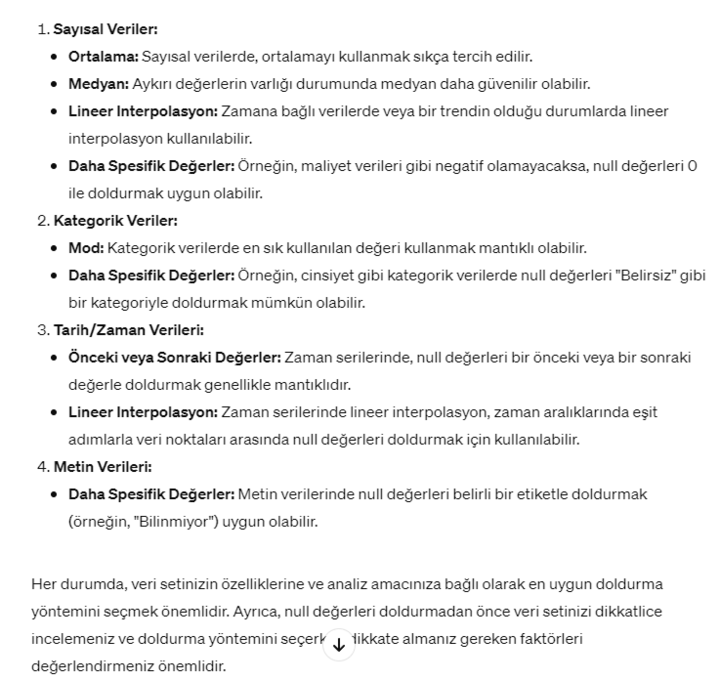

**rating_median = df["Rating"].median():** Bu satır, "Rating" adlı sütundaki verilerin ortanca (median) değerini hesaplar ve bu değeri "rating_median" adlı bir değişkene atar. Ortanca, veri setinin sıralandığında ortada bulunan değerdir ve veri setindeki değerlerin yarıdan fazlasını temsil eder.

In [ ]:
rating_median = df["Rating"].median()
rating_median

**df["Rating"].fillna(rating_median, inplace=True):** Bu satır, "Rating" sütunundaki eksik değerleri ("NaN" olarak temsil edilir) "rating_median" değeri ile doldurur. fillna işlevi, belirtilen sütundaki eksik değerleri doldurmak için kullanılır. inplace=True parametresi, bu değişikliğin veri çerçevesine doğrudan uygulanmasını sağlar, yani yeni bir veri çerçevesi oluşturmak yerine mevcut veri üzerinde değişikliği sabit kılar.

In [ ]:
df["Rating"].fillna(rating_median, inplace=True)

# df["Rating"].fillna(df["Rating"].median(), inplace=True)

Diğer sütunlarda daha az sayıda eksiklik olduğundan bunları düşürmekte sakınca görmüyorum.

**dropna():** Eksik değerlere sahip olan satırları (gözlemleri) kaldırmak için kullanılır.

**inplace=True:** "True" olarak ayarlandığında, işlem data frame üzerinde yaptığımız değişiklikleri kalıcı hale getirir.

In [ ]:
df.dropna(inplace=True)

**sum():** Bu, "True" değerlerin sayısını toplar. Yani, her sütun için eksik değerlerin sayısını hesaplar.

**İkinci sum():** İlk sum() işlemi sonucunda hesaplanan her sütun için eksik değerlerin sayısını toplar. Böylece, veri çerçevesindeki tüm eksik değerlerin toplam sayısını verir.

In [ ]:
df.isnull().sum().sum()

In [ ]:
df

## <font color='green'> <b>Reviews</b><font color='black'>

- **count:** 10,829 eksik olmayan değer var.
- **unique:** Bu 10,829 değerden 5,999 tanesi benzersiz.
- **top:** En sık rastlanan değer "0".
- **freq:** "0" değeri 594 kez tekrar ediyor.

Bu istatistikler, "Reviews" sütununun bir **kategorik** veya **metin** verisi olarak algılandığını gösteriyor. Eğer bu sütun sayısal bir veri türüne sahipse (yani, yorum sayıları), bu sütunu bir sayısal veri türüne (örneğin, int veya float) dönüştürmeniz faydalı olabilir. Bu dönüşüm, daha sonra bu sütun üzerinde sayısal analizler yapmayı kolaylaştırır.

"0" değerinin yüksek frekansı, bu sütunda birçok uygulamanın hiç yorum almadığını veya bu verinin eksik olduğunu gösteriyor olabilir. Bu tür durumlar, veri setini analiz ederken veya model oluştururken dikkate alınmalıdır.

Bu istatistikler ayrıca, "Reviews" sütununun veri setinde nasıl bir dağılım gösterdiği hakkında genel bir fikir verir. Örneğin, en sık rastlanan değer ve frekansı, veri setinin ne kadar çeşitli olduğu veya belirli bir değerin ne kadar yaygın olduğu hakkında bilgi sağlar.

In [ ]:
df["Reviews"].describe()

**df["Reviews"] = df["Reviews"].astype("int64")** kodu, pandas DataFrame'de "Reviews" sütununun veri tipini int64 olarak değiştirir.

Eğer "Reviews" sütunu sayısal değerler içeriyorsa fakat bu değerler bir sayısal veri tipine sahip değilse (örneğin, object veya string olarak saklanıyorsa) kullanılır.

Bu dönüşüm, "Reviews" sütunu üzerinde sayısal analizler yapmayı ve bu sütunu sayısal bir modelde kullanmayı mümkün kılar. Örneğin, şimdi bu sütunun ortalamasını, medyanını, standart sapmasını vb. hesaplayabilirsiniz.

Ancak, bu kodu çalıştırmadan önce "Reviews" sütununda hiç eksik (NaN) veya metinsel değer olmadığından emin olmalısınız. Eğer varsa, astype("int64") dönüşümü hata verecektir. Eksik veya metinsel değerler varsa, bu değerleri uygun bir şekilde doldurmanız veya çıkartmanız gerekecektir.

In [ ]:
df["Reviews"] = df["Reviews"].astype("int64")

- **count:** Eksik olmayan değerlerin sayısı.
- **mean:**  Ortalama değer.
- **std:**  Standart sapma.
- **min:**  Minimum değer.
- **25%:**  Birinci çeyreklik (Q1), yani veri setinin alt %25'lik diliminin üst sınırı.
- **50%:**  Medyan (Q2), yani veri setinin ortanca değeri.
- **75%:**  Üçüncü çeyreklik (Q3), yani veri setinin üst %25'lik diliminin alt sınırı.
- **max:**  Maksimum değer.

In [ ]:
df["Reviews"].describe().round()

## <font color='green'> <b>Category</b><font color='black'>

In [ ]:
df['Category'].unique()

In [ ]:
df['Category'] = df['Category'].str.capitalize().str.replace("_", " ")

In [ ]:
df['Category'].unique()

## <font color='green'> <b>Size</b><font color='black'>   

**print(len(df["Size"].unique())):** "Size" sütununda kaç farklı benzersiz değer olduğunu ekrana yazdırır. 

**df["Size"].unique():** "Size" sütununda yer alan benzersiz değerleri döndürür.

Bu kodlar, "Size" sütununun ne kadar çeşitli olduğunu anlamak için yararlıdır. Örneğin, eğer çok fazla benzersiz değer varsa, bu sütunu modellemede kullanırken bazı önişleme adımları yapmanız gerekebilir (örneğin, kategorik bir değişken olarak kodlama veya sayısal bir değişken olarak dönüştürme).

Ayrıca, bu benzersiz değerlerin ne olduğunu görmek, veri temizliği veya dönüşümü için hangi adımların gerekebileceği konusunda fikir verebilir. Örneğin, eğer "Size" sütunu hem "M" (Megabyte) hem de "K" (Kilobyte) gibi farklı birimler içeriyorsa, bu değerleri aynı birime dönüştürmek gerekebilir.

In [ ]:
print(len(df["Size"].unique()))
df["Size"].unique()

Bu fonksiyonun amacı, verilen bir boyut değerini ("size") megabayt (M) cinsine dönüştürmektir.

1. **if isinstance(size, str):**: Fonksiyon, ilk olarak size parametresinin bir string olup olmadığını kontrol eder. Eğer string ise, içeriğe göre dönüşüm yapılacaktır.

2. **if 'k' in size:**: Eğer size içinde 'k' karakteri varsa, bu kilobayt (K) cinsinden bir değer olduğunu gösterir. Dönüşümü megabayt cinsine yapabilmek için kilobayt değerini 1024'e böler. Sonuçta çıkan ondalık sayıyı yuvarlar (round) ve 2 ondalık basamağa kadar gösterir.

3. **elif 'M' in size:**: Eğer size içinde 'M' karakteri varsa, zaten megabayt (M) cinsindendir. 'M' karakterini kaldırır ve sayısal değeri döndürür.

4. **else:**: Eğer 'k' veya 'M' içermiyorsa (örneğin, "Varies with device" gibi), None döndürülür. Bu, değerin bilinmediğini gösterir.

5. **return None**: Eğer size parametresi string değilse (örneğin None veya NaN), fonksiyon None döndürür.

In [ ]:
# df['Converted_Size'] = df['Size'].apply(
#     lambda x: None if x == 'Varies with device' else x[:-1]
#     if x[-1] == 'M' else round(float(x[:-1]) / 1024, 2))

In [ ]:
# 'Size' sütununu dönüştüren fonksiyon
def convert_to_megabytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return round(float(size.replace('k', '')) / 1024, 2)
        elif 'M' in size:
            return float(size.replace('M', ''))
        else:
            return None  # 'Varies with device' veya sayıya dönüştürülemeyen diğer değerler için
    return None  # None veya NaN için

In [ ]:
# 'Size' sütununu dönüştürüyoruz
df['Converted_Size'] = df['Size'].apply(convert_to_megabytes)

In [ ]:
# Dönüştürülen 'Converted_Size' sütunu ile orijinal 'Size' sütununu karşılaştıralım
sample_data = df[df['Size'].str.contains('k|M', na=False)]
sample_data[['Size', 'Converted_Size']].sample(20)

In [ ]:
# df["Size"].replace("M","", regex=True, inplace = True)
# df["Size"].replace("k","", regex=True, inplace = True)

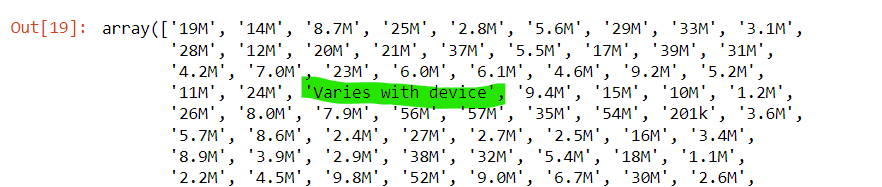

Şimdi "Size" column unda "Varies with device" olarak belirtilmiş değerlerin, bu column un medyanı (ortanca değeri) ile değişitirlmesini sağlayacağız. Bunun için öncelikle "Size" sütununun medyanını hesaplayalayacağız. Sonrada bu değer ile Varies with device değerlerini değiştireceğiz. Bu sayede "Size" sütununda "Varies with device" olarak belirtilmiş değerlerin ne olduğu belirsiz olduğu için, bu değerleri bu sütunun medyanı ile doldurarak aslında bir feature engineering yapıyoruz.

Medyan, genellikle aykırı değerlerin etkisinden daha az etkilenir, bu yüzden eksik veya belirsiz verileri doldurmak için iyi bir seçenek olarak düşünülebilir.

Bu işlemi yapmak için, öncelikle "Varies with device" olmayan satırların medyanını hesaplayabilir ve ardından bu medyan değeri ile "Varies with device" olan satırları değiştirebilirsiniz. 

**df[df["Size"]!="Varies with device"]:** DataFrame'den ("df"), "Size" sütunu "Varies with device" olmayan satırları seçer.

**["Size"].astype(float):** Seçilen satırların "Converted_Size" sütununu float türüne dönüştürür. Bu, medyanı hesaplamak için gereklidir çünkü medyan, sayısal bir ölçüdür.

**.median():** "Converted_Size" sütununun medyanını hesaplar.

Sonuç olarak, size_median değişkeni bu medyan değerini saklar. Bu değer, "Converted_Size" sütununda "Varies with device" olarak belirtilmiş veya eksik olan değerleri doldurmak için kullanılabilir. 

Medyan, veri setindeki aykırı değerlerden daha az etkilendiği için, genellikle eksik verileri doldurmak için iyi bir seçenektir.

In [ ]:
size_median = df[df["Converted_Size"]!="Varies with device"]["Converted_Size"].astype(float).median()
size_median

**Kod Açıklaması**

Bu kod parçası, "Size" sütununda "Varies with device" olarak belirtilmiş değerleri, daha önce hesaplanmış olan size_median (medyan) değeri ile değiştirir.

**df["Size"].replace("Varies with device", size_median, inplace=True):** "Size" sütununda "Varies with device" olarak belirtilmiş tüm değerleri size_median ile değiştirir. inplace=True parametresi, değişikliklerin aynı DataFrame üzerinde yapılmasını sağlar.

Bu işlem, "Size" sütununda belirsiz olan değerleri bir sayısal değerle doldurur, böylece bu sütun daha sonra sayısal analizler veya makine öğrenimi modelleri için kullanılabilir hale gelir. Bu tür bir değişiklik, genellikle öznitelik mühendisliği olarak kabul edilir, çünkü modelin bu öznitelikten (sütundan) daha etkili bir şekilde yararlanabilmesi için veriyi dönüştürmeyi amaçlar.

In [ ]:
df["Converted_Size"].replace("Varies with device", size_median, inplace=True)

**pd.to_numeric(df.Converted_Size):** Pandas'ın to_numeric fonksiyonu, "Converted_Size" sütunundaki değerleri sayısal bir formata dönüştürür. Eğer dönüşüm sırasında bir hata olursa (örneğin, sayısal olmayan bir değer varsa), bir hata mesajı döndürecektir.

Bu işlem, "Converted_Size" sütununun sayısal analizler veya makine öğrenimi modelleri için kullanılabilir hale gelmesini sağlar. 

In [ ]:
df.Converted_Size = pd.to_numeric(df.Converted_Size)

In [ ]:
df.Converted_Size.head()

**df.Size.describe().round()** kodu, "Converted_Size" sütununun temel istatistiklerini hesaplar ve bu değerleri en yakın tam sayıya yuvarlar.

In [ ]:
df.Converted_Size.describe().round(1)

In [ ]:
df.drop("Size", axis=1, inplace=True)

In [ ]:
df.columns

## <font color='green'> <b>Installs</b> <font color='black'>   

In [ ]:
df["Installs"].unique()

**df.Installs = df.Installs.apply(lambda x:x.replace("+","")):** Bu kod, "Installs" sütunundaki her bir değerde "+" karakterini kaldırır. Örneğin, "10,000+" değeri "10,000" olarak değiştirilir.

**df.Installs = df.Installs.apply(lambda x:x.replace(",","")):** Bu kod, "Installs" sütunundaki her bir değerde virgül (",") karakterini kaldırır. Örneğin, "10,000" değeri "10000" olarak değiştirilir.

**df.Installs = df.Installs.apply(lambda x:int(x)):** Bu kod, "Installs" sütunundaki her bir değeri bir tam sayıya (int) dönüştürür. Örneğin, "10000" değeri 10000 olarak değiştirilir (string değil, tam sayı).

Bu işlemler, "Installs" sütununu sayısal analizler veya makine öğrenimi modelleri için uygun bir forma getirir. Bu tür bir dönüşüm genellikle öznitelik mühendisliği olarak kabul edilir, çünkü modelin bu öznitelikten daha etkili bir şekilde yararlanabilmesi için veriyi dönüştürmeyi amaçlar.

In [ ]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

In [ ]:
df["Installs"].unique()

Bu benzersiz değerler, uygulamaların ne kadar indirildiğini gösterir. Örneğin:

10,000: Uygulamanın 10,000 kez indirildiğini gösterir.

500,000: Uygulamanın 500,000 kez indirildiğini gösterir.

1,000,000: Uygulamanın 1,000,000 kez indirildiğini gösterir.

... ve benzeri.

Bu değerlerin tam sayı olarak saklanması, sayısal analizler ve makine öğrenimi modelleri için bu sütunu daha kullanışlı hale getirir.

Örneğin, bu sayısal değerleri bir regresyon modelinde bağımlı veya bağımsız değişken olarak kullanabilirsiniz.

## <font color='green'><b>Price</b> <font color='black'>   

Bu bilgi, "Price" sütununu nasıl önişleyeceğinizi (preprocess) veya dönüştüreceğinizi (transform) belirlemeniz için önemli olabilir. Örneğin, eğer bu sütun sayısal değerler içeriyorsa fakat bu değerler bir string formatında saklanıyorsa (örneğin, "$1.99" gibi), bu değerleri sayısal bir formata dönüştürmek gerekebilir.

Bu tür bir analiz, veri setinin genel bir anlayışını kazanmak ve özellikle bu sütunun modelleme aşamasına geçmeden önce nasıl bir dağılım gösterdiğini anlamak için yararlıdır.

In [ ]:
df["Price"].unique()

**df.Price = df.Price.apply(lambda x:x.replace("$","")):** Bu satır, "Price" sütunundaki değerlerin başındaki `\$` işaretini kaldırır. apply yöntemi, her bir sütun değerine belirli bir işlem uygulamanıza olanak tanır. Bu durumda, lambda fonksiyonu kullanılarak her bir değerdeki `\$` işareti boş bir dizeyle değiştirilir.

**df.Price = df.Price.apply(lambda x:float(x)):** Bu satır, "Price" sütunundaki değerleri ondalık (float) bir sayıya dönüştürür. apply yöntemi, her bir sütun değerine dönüşüm işlemi uygulamak için kullanılır. Bu durumda, float() fonksiyonu ile her bir değer ondalık bir sayıya dönüştürülür.

Sonuç olarak, bu kod parçacığı "Price" sütunundaki değerleri temizler ve ondalık sayı veri türüne dönüştürür. Bu işlem, sütundaki fiyatları sayısal veriler olarak kullanmanız gerektiğinde oldukça yararlıdır.

In [ ]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

In [ ]:
df["Price"].unique()

## <font color='green'> <b>Genres</b><font color='black'>  

In [ ]:
df["Genres"].nunique()

In [ ]:
df["Genres"].head(10)

Bu çıktı, "Genres" sütununun ilk 10 satırını göstermektedir. Gördüğümüz gibi, bu sütun genellikle bir veya birden fazla tür veya kategori içermektedir. Türler ve kategoriler arasında bir noktalı virgül **(";")** ile ayrım yapılmış.

**Örneğin:**

"Art & Design": Bu, uygulamanın "Art & Design" kategorisine ait olduğunu gösterir.
"Art & Design;Pretend Play": Bu, uygulamanın hem "Art & Design" hem de "Pretend Play" kategorilerine ait olduğunu gösterir.
"Art & Design;Creativity": Bu, uygulamanın hem "Art & Design" hem de "Creativity" kategorilerine ait olduğunu gösterir.
Bu tür bir sütun, genellikle kategorik bir öznitelik olarak kabul edilir ve bu tür öznitelikler genellikle makine öğrenimi modelleri için önişleme gerektirir. Örneğin, bu tür bir sütunu modelinize dahil etmek istiyorsanız, "One-Hot Encoding" gibi bir yöntem kullanarak bu kategorik değişkeni sayısal bir forma dönüştürebilirsiniz.

Bu çıktı ayrıca, veri setinin ne tür uygulamaları kapsadığı hakkında da fikir verir. Örneğin, bu örnek veri seti, ilk 10 satırda yalnızca "Art & Design" kategorisine ait uygulamaları içermektedir. Ancak bu, tüm veri setinin de bu şekilde olduğu anlamına gelmez; bu yalnızca ilk 10 satır için geçerlidir.

119 unique olan column u ben burada biraz azaltacağım bu sebeple özellikle noktalı virgülle ayrılan türlerin olduğu satıra bakalım burada alt türleri almak istemiyorum. Ana tür ile yürümek istiyorum. Bu kapsamda buna yönelik bir kod yazacağım.

**Kod Açıklaması**

Bu kod parçası, "Genres" sütunundaki değerleri noktalı virgül (";") ile ayırır ve ardından ilk öğeyi (index 0) alır. Yani eğer bir satırda birden fazla tür veya kategori varsa (örneğin, "Art & Design;Pretend Play"), bu kod sadece ilk türü veya kategoriyi alır ("Art & Design").


**df["Genres"].str.split(";"):** Bu kısım, "Genres" sütunundaki her bir değeri noktalı virgül (";") ile ayırır. Sonuç olarak her bir satır için bir liste döner.

**.str[0]:** Bu kısım, oluşturulan listenin ilk öğesini alır (Python'da indexler 0'dan başlar).

Bu işlem, "Genres" sütununu daha basit bir forma dönüştürmeyi amaçlar. Örneğin, eğer bir uygulama birden fazla türe sahipse, bu kod sadece ilk türü alır. Bu, özellikle makine öğrenimi modelleri için veri setini daha yönetilebilir hale getirebilir, ancak bu yaklaşımın bir uygulamanın birden fazla türü veya kategorisi olduğu durumda bazı bilgileri kaybedebileceğini unutmamak önemlidir.

In [ ]:
df["Genres"] = df["Genres"].str.split(";").str[0]

**Kod açıklaması**

**len(df["Genres"].unique())** kodu, "Genres" sütununda kaç farklı benzersiz değer olduğunu sayar.

Bu kod, "Genres" sütununun ne kadar çeşitli olduğu hakkında bir fikir verir. Örneğin, eğer bu sayı çok yüksekse, bu sütunun çok fazla farklı kategori veya tür içerdiğini gösterir. Eğer sayı düşükse, bu genellikle sütunun daha az çeşitlilik gösterdiği anlamına gelir.

Bu tür bir analiz, veri setinin genel bir anlayışını kazanmak ve özellikle bu sütunun modelleme aşamasına geçmeden önce nasıl bir dağılım gösterdiğini anlamak için yararlıdır.

In [ ]:
df["Genres"].nunique()

In [ ]:
df["Genres"].unique()

In [ ]:
df["Genres"].value_counts()

Bu output ile Music ve Music & Audio nun aynı anlamda kullanıldığı izlenimini veriyor bu sebeple hepsini Music olarak düzeltmem doğru olacaktır.

In [ ]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

## <font color='Green'> <b>Last_Updated</b><font color='black'> 

"Last_Updated" sütunu, uygulamanın en son ne zaman güncellendiğini gösteren tarihleri içerir. Bu sütun genellikle tarih formatında olur (örneğin, "January 7, 2018").

Bu kodun çıktısı, bu sütunun genel yapısını ve tarihlerin nasıl saklandığını gösterir. Eğer bu sütunu modelinizde kullanmayı planlıyorsanız, tarihleri sayısal bir forma dönüştürmek veya tarihler arasında geçen gün sayısını hesaplamak gibi önişleme adımları gerekebilir.

Bu tür bir analiz, veri setinin genel bir anlayışını kazanmak ve özellikle bu sütunun modelleme aşamasına geçmeden önce nasıl bir dağılım gösterdiğini anlamak için yararlıdır.

In [ ]:
df["Last_Updated"].head()

**pd.to_datetime(df["Last_Updated"]):** Pandas kütüphanesinin to_datetime fonksiyonu, bir dizi, serisi veya tek bir tarih değerini datetime nesnesine dönüştürebilir. Bu kod parçası, "Last_Updated" sütunundaki tüm değerleri datetime nesnesine dönüştürür.

Bu dönüştürme işlemi, tarihlerle daha kolay çalışabilmek için yararlıdır. Örneğin, şimdi bu sütunu kullanarak uygulamanın en son ne zaman güncellendiğinden bu yana geçen gün sayısını hesaplayabilir, veya yıllara, aylara veya günler gibi belirli bir zaman dilimine göre gruplayabilirsiniz. 

In [ ]:
# Tarih-saat dizisini oluştur

df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [ ]:
# Yıl, Ay ve Gün'ü ayrı sütunlara ayır

df['Year'] = df['Last_Updated'].dt.year
df['Month'] = df['Last_Updated'].dt.month
df['Day'] = df['Last_Updated'].dt.day

In [ ]:
df.head()

In [ ]:
df.dtypes

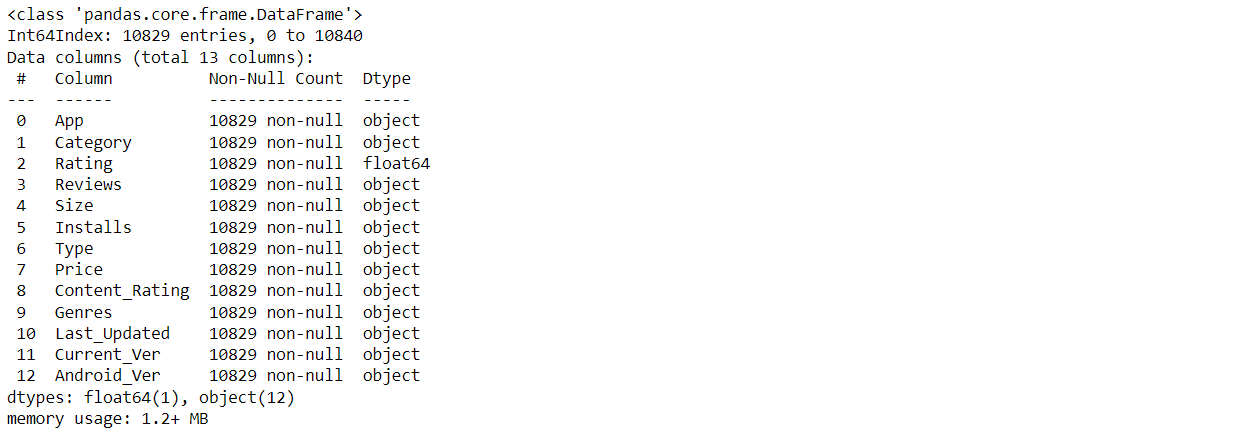

# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Research Queries and Analytical Insights</b></p>
![](https://neilpatel.com/wp-content/uploads/2021/03/Data-Visualization_Featured-Image-1.png)

## <font color='green'><b> What are the top categories in terms of the number of apps?</b><font color='black'> 

Type sütunundaki değerlerin frekansını gösteren bir bar grafiği oluşturuyoruz.

**type_counts = df['Type'].value_counts():** Bu satır, Type sütunundaki her bir benzersiz değerin kaç kez tekrar ettiğini hesaplar ve bu bilgiyi type_counts değişkenine kaydeder.

**plt.figure(figsize=(15, 10)):** Bu satır, oluşturulacak grafik için boyutu 15x10 olarak ayarlar.

**plt.bar(type_counts.index, type_counts.values, color=['blue', 'orange']):** Bu satır, bar grafiğini çizer. type_counts.index x ekseninde gösterilecek değerlerdir ("Free" ve "Paid"), type_counts.values ise y ekseninde gösterilecek değerlerdir (her bir tür için uygulama sayısı).

**plt.xlabel('Uygulama Türü'), plt.ylabel('Uygulama Sayısı'), plt.title('Uygulama Türüne Göre Uygulama Sayısı'):** Bu satırlar, x ve y eksenlerine etiket ekler ve grafiğe bir başlık verir.

**plt.show():** Bu satır, grafiği gösterir.

In [ ]:
# 'Type' sütunundaki değerlerin sayısını al

type_counts = df['Type'].value_counts()
type_counts

In [ ]:
plt.figure(figsize=(8, 5))  # Grafik boyutunu ayarla
bars = plt.bar(type_counts.index, type_counts.values, color=['blue', 'green'])  # "bars" değişkenine atama yap

# Eksen etiketleri ve başlık
plt.xlabel('Application Type')
plt.ylabel('Number of Applications')
plt.title('Number of Applications by Application Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    
plt.show()

## <font color='green'> <b>What is the distribution of ratings by application type?</b><font color='black'> 

Type sütunundaki her bir benzersiz değer ("Free" ve "Paid") için Rating değerlerinin bir box plot'ını çiziyoruz.

**plt.figure(figsize=(15, 10)):** Bu satır, oluşturulacak grafik için boyutu 15x10 olarak ayarlar.

**sns.boxplot(...):** Bu satır, seaborn kütüphanesini kullanarak box plot'u çizer. palette parametresi ile "Free" için mavi ("blue") ve "Paid" için yeşil ("green") renkler ayarlanmıştır.

**plt.xlabel('Uygulama Türü'), plt.ylabel('Rating'), plt.title('Uygulama Türüne Göre Rating Dağılımı'):** Bu satırlar, x ve y eksenlerine etiket ekler ve grafiğe bir başlık verir.

**plt.show():** Bu satır, grafiği gösterir.

In [ ]:
# Grafik boyutunu ayarla
plt.figure(figsize=(8, 6))

# Seaborn kütüphanesi ile box plot çiz ve renkleri ayarla
sns.boxplot(x='Type', y='Rating', data=df, palette={"Free": "blue", "Paid": "green"}) # whis=3 yapabiliriz 

# Eksen etiketleri ve başlık
plt.xlabel('Application Type')
plt.ylabel('Rating')
plt.title('Rating Distribution by Application Type')

# Göster
plt.show()

**Alt yatay çizgi (whisker) = Minimum (En Düşük Değer):** Veri setindeki en düşük değeri temsil eder. Ancak, bu çizgi aykırı değerleri (outliers) göz ardı eder.

**Üst yatay çizgi (whisker) = Maksimum (En Yüksek Değer):** Veri setindeki en yüksek değeri temsil eder. Ancak, bu çizgi de aykırı değerleri göz ardı eder.

**Kutunun alt kenarı = İlk Çeyrek (Q1):** Veri setinin ilk çeyreğini (ilk 25%) temsil eder.

**Kutunun üst kenarı = Üçüncü Çeyrek (Q3):** Veri setinin üçüncü çeyreğini (ilk 75%) temsil eder.

**Kutu içindeki yatay çizgi = Median (Q2):** Veri setinin medyanını (ortanca değerini) temsil eder.

- **IQR (Interquartile Range):** İlk ve üçüncü çeyrekler arasındaki fark, yani kutunun yüksekliği. IQR, veri dağılımının ne kadar yaygın olduğunu gösterir.

- **Aykırı Değerler (Outliers):** Üst ve alt yatay çizgilerin dışında kalan noktalar, aykırı değerleri temsil eder.

- **Kutu (Box):** İlk çeyrek (Q1) ve üçüncü çeyrek (Q3) arasındaki alanı temsil eder ve veri setinin merkezi dağılımını gösterir.

Bu grafik, ücretsiz ve ücretli uygulamaların rating dağılımlarını karşılaştırmanıza olanak tanır. Örneğin, ücretsiz uygulamaların rating'leri genellikle daha mı yüksek, yoksa ücretli uygulamalar mı daha yüksek puan alıyor, gibi sorulara cevap arayabilirsiniz. Ayrıca, aykırı değerlerin varlığı da gözlemlenebilir.

**NOT**

Eğer aklınıza whisker dışında olan değerlerin neden minimum veya maksimum olarak kabul edilmediği gibi bir soru gelirse bunun bilgisi için aşağıdaki not size cevap olacaktır.

- Box plot'ta gösterilen "minimum" ve "maksimum" değerler, aslında aykırı değerleri (outliers) göz ardı eden "whisker"lar olarak adlandırılır. Yani, bu çizgiler veri setinin çoğunu kapsayan, ancak aykırı değerleri hariç tutan değer aralığını gösterir.

- Bu "whisker"lar genellikle IQR (interquartile range, yani Q3 - Q1) kullanılarak hesaplanır. Örneğin, alt whisker genellikle "Q1 - 1.5 * IQR" formülü ile ve üst whisker "Q3 + 1.5 * IQR" formülü ile hesaplanır. Bu formüller, veri dağılımının genel yapısını yansıtmak için tasarlanmıştır ve aykırı değerleri dışarıda bırakmayı amaçlar.

- Bu nedenle, box plot'ta gösterilen "minimum" ve "maksimum" değerler, tüm veri setinin en düşük ve en yüksek değerleri değildir. Bunun yerine, bu değerler veri setinin çoğunu temsil eden ve aykırı değerleri hariç tutan bir aralığı gösterir.

- box plot veri setinin "tipik" bir aralığını göstermek için tasarlanmıştır, ancak aykırı değerleri de göz önünde bulundurur. Yani, box plot hem merkezi eğilimi (medyan, çeyrekler) hem de veri dağılımının yayılımını (IQR, aykırı değerler) bir arada gösterir.

## <font color='green'><b> What are the categories of ratings and their counts?</b><font color='black'> 

Veri kümesinde bulunan farklı "Rating" (Puan) kategorilerinin ne kadar sık olduğunu gösteriyoruz. 

**plt.figure(figsize=(15, 10)):** Matplotlib kütüphanesini kullanarak oluşturulacak grafik için boyutu ayarlar. Genişlik 15 birim, yükseklik 10 birim olarak belirlenmiştir.

**sns.countplot(x="Rating", data=df):** Seaborn kütüphanesinin countplot fonksiyonu ile "Rating" sütunundaki değerlerin sayısını gösteren bir dikey bar plot çizer. x parametresi ile hangi sütunun kullanılacağı belirlenir, data parametresi ile de veri çerçevesi belirlenir.

**plt.title("Puan Kategorileri ve Sayıları"):** Grafik başlığını ayarlar.

**plt.xlabel("Rating Kategorileri") ve plt.ylabel("Uygulama Sayısı"):** X ve Y eksenlerinin etiketlerini ayarlar.

**plt.show():** Grafiği ekrana çizer.

- Hangi puan kategorisi en çok veya en az gözleme sahiptir?

- Puan dağılımı nasıldır? (örneğin, çoğu uygulama yüksek puanlı mı, düşük puanlı mı?)

- Puan kategorileri arasında belirgin bir dengesizlik var mı?

In [ ]:
# Grafik boyutunu ayarla
plt.figure(figsize=(11,8))

# Seaborn ile dikey bar plot çiz
ax = sns.countplot(x="Rating", data=df) #Sıralamak için , order=df['Rating'].value_counts().sort_index().index

for container in ax.containers:
    ax.bar_label(container)

# Grafik başlığı
plt.title("Rating Categories and Numbers")

# Eksen etiketleri
plt.xlabel("Rating Categories")
plt.ylabel("Number of Applications")

# Grafik gösterimi
plt.show()

Veri kümesindeki uygulamaların "Content Rating" (İçerik Derecelendirmesi) kategorilerine göre dağılımını gösteriyoruz. 

**plt.figure(figsize=(15, 10)):** Grafik boyutunu ayarlar.

**sns.countplot(y="Content_Rating", data=df, order = df['Content_Rating'].value_counts().index):** "Content_Rating" sütunundaki değerlerin sayısını gösteren bir yatay bar plot çizer. y parametresi ile hangi sütunun kullanılacağı belirlenir. order parametresi ile bar'lar en yüksek sayıdan en düşüğe doğru sıralanır.

**plt.title("İçerik Derecelendirmeleri ve Sayıları"):** Grafik başlığını ayarlar.

**plt.xlabel("Uygulama Sayısı") ve plt.ylabel("Content Rating"):** X ve Y eksenlerinin etiketlerini ayarlar.

**plt.show():** Grafiki ekrana çizer.

- Hangi içerik derecelendirmesi en yaygın veya en nadir?

- İçerik derecelendirmeleri arasında nasıl bir dağılım var?

- Belirli bir yaş grubu veya hedef kitle için ne kadar uygulama mevcut?

In [ ]:
# Grafik boyutunu ayarla
plt.figure(figsize=(14, 9))

# Seaborn ile yatay bar plot çiz
ax = sns.countplot(y="Content_Rating", data=df, order = df['Content_Rating'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)

# Grafik başlığı
plt.title("Content Ratings and Numbers")

# Eksen etiketleri
plt.xlabel("Number of Applications")
plt.ylabel("Content Rating")

# Grafik gösterimi
plt.show()

## <font color='green'> <b>How Does Content Rating Affect User Ratings in Apps?</b><font color='black'>

Farklı "Content Rating" (İçerik Derecelendirmesi) kategorilerine sahip Android uygulamalarının kullanıcı puanları ("Rating") dağılımını gösteriyoruz.

**plt.figure(figsize=(15, 10)):** Grafik boyutunu ayarlar. Genişlik 15 birim, yükseklik 10 birim olarak belirlenmiştir. (Bu satır kodda eksik, eğer eklemek isterseniz.)

**sns.boxplot(x = "Content_Rating", y = "Rating", data = df):** Seaborn kütüphanesinin boxplot fonksiyonu ile "Content_Rating" sütunundaki kategorilere göre "Rating" sütununun dağılımını gösteren bir box plot çizer. x ve y parametreleri ile hangi sütunların kullanılacağı belirlenir, data parametresi ile de veri çerçevesi belirlenir.

**plt.title("The content rating & rating", size=20):** Grafik başlığını ve başlık boyutunu ayarlar.

- Her bir içerik derecelendirmesi kategorisinin puan dağılımı nasıldır?

- Hangi içerik derecelendirmesi kategorisinin ortalama puanı en yüksek veya en düşüktür?

- İçerik derecelendirmesi kategorileri arasında puan dağılımı açısından belirgin farklar var mı?

In [ ]:
# Grafik boyutunu ayarla
plt.figure(figsize=(15, 10))

# Seaborn ile box plot çiz
# 'x' ve 'y' parametreleri ile hangi sütunların kullanılacağı belirlenir
# 'data' parametresi ile de veri çerçevesi belirlenir
# 'palette' parametresi ile her bir "Content_Rating" kategorisi için renkler belirlenir
sns.boxplot(x="Content_Rating", y="Rating", data=df, palette={"Everyone": "blue", 
                                                              "Teen": "yellow", 
                                                              "Everyone 10+": "green",
                                                              "Mature 17+": "red",
                                                              "Adults only 18+": "orange",
                                                              "Unrated": "purple"})

# Grafik başlığı ve başlık özellikleri
# 'fontdict' parametresi ile başlık için bir sözlük belirlenir
# 'fontsize' anahtarı ile başlık boyutunu 20 olarak, 'color' anahtarı ile de başlık rengini 'darkred' olarak ayarlar
plt.title("The content rating & rating", fontdict={'fontsize': 20, 'color': 'darkred'})

# Grafik gösterimi
plt.show()

Gördüğünüz gibi, Rating Everyone, Teen ve Everyone 10+ için neredeyse aynı. 

Everyone'ın diğer kategorilere göre daha fazla aykırı (outlier) değeri var.

Mature 17+ en düşük ortalamaya sahipken Adults only 18+ kategorisinin reyting ortalaması diğerlerinden daha yüksektir.

## <font color='green'> <b>What Is the Number of Applications in Each Category?</b><font color='black'>

**Kod Açıklaması**

**plt.figure(figsize=(15, 10)):** Matplotlib kütüphanesini kullanarak oluşturulacak grafik için boyutu ayarlar. Genişlik 15 birim, yükseklik 10 birim olarak belirlenmiştir.

**sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index):** Seaborn kütüphanesinin countplot fonksiyonu ile "Category" sütunundaki değerlerin sayısını gösteren bir yatay bar plot çizer. y parametresi ile hangi sütunun kullanılacağı belirlenir, data parametresi ile de veri çerçevesi belirlenir. order parametresi ile bar'lar en yüksek sayıdan en düşüğe doğru sıralanır.

**plt.title("Kategoriye Göre Uygulama Sayıları", fontdict={'fontsize': 20, 'color': 'darkred'}):** Grafik başlığını ve başlık boyutunu ayarlar. fontdict parametresi ile başlık için bir sözlük belirlenir. fontsize anahtarı ile başlık boyutunu 20 olarak, color anahtarı ile de başlık rengini 'darkred' olarak ayarlar.

**plt.xlabel("Uygulama Sayısı") ve plt.ylabel("Kategoriler"):** X ve Y eksenlerinin etiketlerini ayarlar.

**plt.show():** Grafiki ekrana çizer.

In [ ]:
# Grafik boyutunu ayarla
plt.figure(figsize=(15, 10))

# Seaborn ile yatay bar plot çiz. y dersem y eksenini kullanacağından yatay bir bar plot çizecektir.
# 'y' parametresi ile hangi sütunun kullanılacağı belirlenir, 'data' parametresi ile de veri çerçevesi belirlenir
ax = sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index, palette='tab10')

for container in ax.containers:
    ax.bar_label(container)
    
# Grafik başlığı ve başlık özellikleri
plt.title("Application Numbers by Category", fontdict={'fontsize': 20, 'color': 'darkred'})

# Eksen etiketleri
plt.xlabel("Number of Applications")
plt.ylabel("Categories")

# Grafik gösterimi
plt.show()

En çok uygulama Family (aile), sonra Game (oyun), sonra da Tools (araçlar) kategorisindedir.

## <font color='green'> <b>Which Categories Have the Highest Total Spending in Apps?</b><font color='black'>

Google Play Store'da en çok harcama yapılan 5 kategoriyi ve bu kategorilere ne kadar toplam harcama yapıldığını gösteren bir bar grafiği çizdiriyoruz.

**total_spending_by_category = df.groupby('Category')['Price'].sum().sort_values(ascending=False): Kategorilere göre toplam harcamayı hesapla:** 'Category' sütununa göre gruplayarak, her kategoride ne kadar toplam harcama yapıldığını hesaplıyoruz.

**top5_categories = total_spending_by_category.nlargest(5): En çok harcama yapılan 5 kategoriyi seç:** Toplam harcamaları büyükten küçüğe sıralayarak en çok harcama yapılan 5 kategoriyi seçiyoruz.

**plt.figure(figsize=(15, 10)): Bar grafiği çiz:** Seçilen 5 kategoriyi ve bu kategorilere yapılan toplam harcamayı gösteren bir bar grafiği çiziyoruz. Grafiğin boyutunu (15, 10) olarak ayarlıyoruz.

**plt.xlabel('Kategori')
plt.ylabel('Toplam Harcama')
plt.title('En Çok Harcama Yapılan 5 Kategori')
Eksen etiketleri ve başlık:** X eksenine 'Kategori' ve Y eksenine 'Toplam Harcama' etiketlerini ekliyoruz. Grafiğin başlığı olarak 'En Çok Harcama Yapılan 5 Kategori'yi kullanıyoruz.

**plt.show(): Göster:** Grafiği ekranda gösteriyoruz.

- En yüksek toplam fiyata sahip kategoriler hangileridir? 

- Hangi kategorilerde daha yüksek fiyatlandırma stratejileri uygulanmış olabilir?

In [ ]:
# Kategorilere göre toplam harcamayı hesapla
total_spending_by_category = df.groupby('Category')['Price'].sum().sort_values(ascending=False)
total_spending_by_category

In [ ]:
top5_categories = total_spending_by_category.nlargest(5)
top5_categories

In [ ]:
# Bar grafiği çiz
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=top5_categories.index, y=top5_categories.values, order=top5_categories.index)

# Eksen etiketleri ve başlık
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Top 5 Spending Categories')

for container in ax.containers:
    ax.bar_label(container)

# Göster
plt.show()

## <font color='green'> <b>What Are the Correlation Patterns Among Numeric Columns?</b><font color='black'>

Data Frame deki sayısal sütunlar arasındaki korelasyonu görselleştiren bir ısı haritası oluşturuyoruz. Isı haritası, farklı sütunlar arasındaki ilişkinin ne kadar güçlü veya zayıf olduğunu anlamamıza yardımcı olur.

**plt.figure(figsize=(15, 10)):** Matplotlib kütüphanesini kullanarak oluşturulacak grafik için boyutları ayarlıyoruz. Bu durumda, grafik boyutu 15x10 birim olacak.

**sns.heatmap(numeric_df.corr(), annot=True, linewidths=.5, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .75}):** Seaborn kütüphanesinin heatmap fonksiyonu ile bir ısı haritası (heatmap) çiziyoruz.

**df.corr():** Veri çerçevesinin sayısal sütunları arasındaki korelasyon matrisini hesaplıyor.

**annot=True:** Her bir hücre için korelasyon katsayısını gösteriyor.

**linewidths=.5:** Hücreler arasındaki çizgilerin kalınlığını ayarlıyor.

**fmt=".2f":** Sayıların formatını belirtiyor; bu durumda iki ondalık basamağa kadar gösterilecek.

**cmap='coolwarm':** Renk paletini "coolwarm" olarak ayarlıyor.

**cbar_kws={"shrink": .75}:** Renk çubuğunun boyutunu %75 oranında küçültüyor.

**plt.title("Heatmap for Numeric Columns", fontdict={'fontsize': 20, 'color': 'darkred'}):** Grafik için bir başlık ekliyoruz ve başlığın font boyutunu ve rengini ayarlıyoruz.

**plt.show():** Grafiki ekranda gösteriyoruz.

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])

In [ ]:
numeric_df = df[numeric_columns.columns]
numeric_df.columns

In [ ]:
# Grafik boyutunu ayarla
plt.figure(figsize=(15, 10))

# Seaborn ile heatmap çiz
sns.heatmap(numeric_df.corr(), annot=True, linewidths=0.5, fmt=".2f", cmap='RdBu', cbar_kws={"shrink": .75})

# Grafik başlığı ve başlık özellikleri
plt.title("Heatmap for Numeric Columns", fontdict={'fontsize': 20, 'color': 'darkred'})

# Grafik gösterimi
plt.show()

Görüldüğü üzere Kullanıcılar tarafından uygulamanın aldığı toplam yorum sayısı (Reviews) ile Uygulamanın Google Play'den kaç kez indirildiği bilgisi (Installs) arasında 0,64 pozitif korelsayon var.

- Korelasyon, iki değişken arasındaki ilişkinin yönünü ve gücünü ölçer. Korelasyon katsayısı genellikle -1 ile 1 arasında bir değer alır.

- -1'e yakın bir korelasyon, iki değişken arasında güçlü bir negatif ilişki olduğunu gösterir.
- 1'e yakın bir korelasyon, iki değişken arasında güçlü bir pozitif ilişki olduğunu gösterir.
- 0'a yakın bir korelasyon, iki değişken arasında zayıf bir ilişki olduğunu gösterir.
- Bu durumda, "Reviews" (Yorum Sayısı) ve "Installs" (İndirilme Sayısı) arasında 0,64 değerinde orta seviyede bir pozitif korelasyon (ilişki) olduğu söyelenebilir. Yani, genellikle bir uygulamanın yorum sayısı arttıkça, indirilme sayısının da artması beklenir.
- Ancak, bu bir nedensellik ilişkisi değildir; yani yorum sayısının artması indirilme sayısını artırmaz, sadece iki değişken arasında bir ilişki olduğunu gösterir.

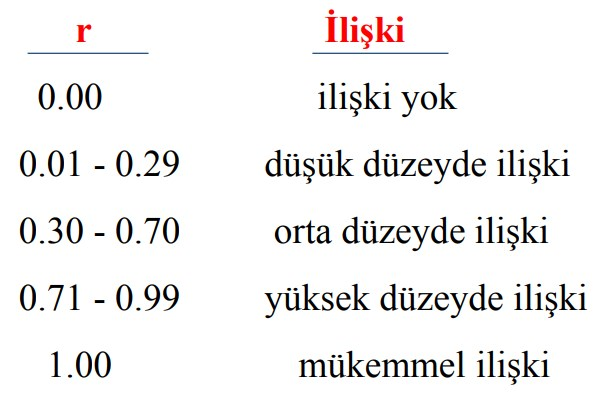

## <font color='green'> <b>How Is the Distribution of Ratings Among Applications?</b><font color='black'>

Google Play Store'daki uygulamaların puan dağılımını göstereceğiz. Histogram ve yoğunluk tahmini (Kernel Density Estimation (KDE)) bir arada kullanılarak, uygulamaların puanlarının nasıl dağıldığı daha ayrıntılı bir şekilde göstereceğiz.

**Grafik Boyutunu Ayarla: plt.figure(figsize=(15, 10))** ile grafiğin boyutunu (15, 10) olarak ayarlıyoruz.

**Histogram ve KDE Çiz: sns.histplot()** fonksiyonu ile 'Rating' sütunundan eksik değerler (dropna()) çıkarıldıktan sonra bir histogram ve KDE grafiği çiziyoruz. bins=30 ile 30 kutu (bar) kullanıyoruz. kde=True ile yoğunluk tahmini grafiği de ekleniyor.

**Grafik Başlığı ve Başlık Özellikleri: plt.title()** ile grafiğe "Uygulama Puan Dağılımı" başlığını ekliyoruz ve font büyüklüğü ile rengini ayarlıyoruz.

**Eksen Etiketleri: plt.xlabel() ve plt.ylabel()** ile X ve Y eksenlerine "Puan" ve "Frekans" etiketleri ekleniyor.

**X Eksenindeki Etiketleri Özelleştir: plt.xticks(np.arange(0, 5.1, 0.1),  rotation=90)** ile X eksenindeki etiketler 0'dan 5'e kadar 0.1'lik adımlarla yerleştiriliyor ve bu yazıların karışık gözükmemesi için 90 derecelik açı ile daha anlaşılır yapıyoruz.

**Grafik Gösterimi: plt.show()** ile grafiği ekranda gösteriyoruz.

- Uygulamaların puanları genellikle hangi değerler etrafında toplanmıştır?
- Dağılım simetrik mi, yoksa bir tarafa mı çarpıktır?
- Puanlar genellikle bir aralıkta mı yoğunlaşmış, yoksa daha dağılmış mıdır?

**KDE Eğrisi:** Verinin nasıl bir dağılım gösterdiğini daha düzgün bir çizgi ile ifade eder. Bu, verinin genel "şeklini" anlamak için yararlıdır.

In [ ]:
# Grafik boyutunu ayarla
plt.figure(figsize=(15, 10))

# Seaborn ile histogram ve KDE çiz
ax = sns.histplot(df['Rating'], bins=30, kde=True, color='blue', edgecolor='black')

#kde: bir veri setinin dağılımını ve yoğunluğunu tahmin etmek için kullanılan bir yöntemdir.

for container in ax.containers:
    ax.bar_label(container)

# Grafik başlığı ve başlık özellikleri
plt.title("Application Point Distribution", fontdict={'fontsize': 20, 'color': 'darkred'})

# Eksen etiketleri
plt.xlabel("Rating", color="darkred")
plt.ylabel("Frequency", color="darkred")

# X eksenindeki etiketleri özelleştir
plt.xticks(np.arange(0, 5.1, 0.1), rotation=90)
plt.tick_params(axis='both', colors='darkred')

# Grafik gösterimi
plt.show()

**Histogram:** Her bir bar (kutu), belirli bir puan aralığındaki uygulama sayısını (frekansı) gösterir.

**KDE:** Mavi çizgi, puan dağılımının yoğunluk tahminini gösterir. Bu, hangi puan aralığının daha sık olduğunu anlamamıza yardımcı olur.

**X Ekseni:** Uygulamaların aldığı puanlar (0 ile 5 arasında).

**Y Ekseni:** Her bir puan aralığındaki uygulama sayısı (frekans).

**Histogram:**
Histogram, bir veri setindeki değerlerin dağılımını görselleştirmek için kullanılır. Veri seti belirli aralıklara (genellikle eşit büyüklükte) bölünür ve her bir aralıkta kaç veri noktası olduğu sayılır. Bu sayede, veri setinin genel yapısını daha iyi anlayabiliriz.

Örneğin, 4.3 puanında bir artış görmek, bu puan aralığındaki uygulama sayısının diğer puan aralıklarına göre daha fazla olduğunu gösterir. Yani, kullanıcılar genellikle bu puanı daha sık vermişler.

**KDE (Kernel Density Estimation):**
KDE, bir veri setinin olasılık yoğunluk fonksiyonunu tahmin etmek için kullanılır. Basitçe söylemek gerekirse, KDE bize veri setindeki her bir noktanın etrafında bir "yoğunluk" oluşturur ve bu yoğunlukları toplar. Sonuç olarak, daha pürüzsüz bir dağılım grafiği elde edilir.

Histogramda 4.3 puanında bir artış görmek ve KDE grafiğinde de bu puan etrafında bir "tepe" oluşması, bu puanın veri setinde sıkça rastlanan bir değer olduğunu gösterir. Yani, bu puan aralığındaki uygulamaların sayısı diğer puanlara göre daha fazladır ve kullanıcılar bu puanı daha sık vermişlerdir.

Bu iki gözlem bir araya getirildiğinde, uygulamaların genellikle 4.3 puan gibi yüksek puanlar aldığını ve bu puanın kullanıcılar tarafından sıkça verildiğini söyleyebiliriz.

## <font color='green'> <b>What Are the Most Common Words in the Names of Google Play Store Apps?</b><font color='black'>

Google Play Store'da hangi kelimelerin veya terimlerin sıkça kullanıldığına dair bir fikir edinmek istiyoruz.

**text = ' '.join(df['App'])** ('df') "App" sütununda bulunan tüm uygulama isimlerini birleştiriyoruz. Her bir isim arasına bir boşluk koyarak tek bir büyük metin oluşturuyoruz.

**wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)** oluşturulan büyük metni kullanarak bir kelime bulutu (WordCloud) oluşturuyoruz. Kelime bulutunun boyutlarını (800x400) ve arka plan rengini (beyaz) belirtiyoruz. **generate() metodu,** metinden kelime bulutunu oluşturur.

**plt.figure(figsize=(10, 5))** görselleştirmenin boyutlarını belirtiyoruz. Genişlik 10 birim ve yükseklik 5 birim olacak şekilde ayarlanmıştır.

**plt.imshow(wordcloud, interpolation='bilinear')** kelime bulutunu görüntülemek için **imshow()** fonksiyonunu kullanıyoruz. "bilinear" interpolasyon, görüntünün daha yumuşak görünmesini sağlar.

**plt.axis('off')** grafikteki eksen bilgilerini gizliyoruz. Yani, x ve y eksenindeki etiketler ve rakamlar görüntülenmeyecektir.

**plt.title('Google Play Store Apps Word Cloud')** görselleştirmenin başlığını belirtiyoruz.

**plt.show()** görselleştirmeyi ekrana çizdiriyoruz.

Google Play Store'daki uygulama isimlerinin hangi kelimeleri veya terimleri sıkça kullandığını gösterir.

Sıkça geçen kelimeler daha büyük ve daha belirgin bir şekilde gösterilir.

Bu tür bir görselleştirme genellikle metinde hangi kelimelerin veya terimlerin en yaygın olduğunu hızlı ve etkili bir şekilde görmek için kullanılır. 

- Hangi kelimeler veya terimler uygulama isimlerinde sıkça kullanılıyor?
- Belirli bir kategori veya tür için karakteristik kelimeler veya terimler nelerdir? (Eğer veriyi kategorilere göre filtrelemişseniz)
- Pazarda belirli bir niş veya trend var mı?

Bu tür bir analiz, uygulama geliştiricileri için faydalı olabilir; örneğin, bir uygulama ismi seçerken veya pazardaki rekabeti değerlendirirken.

In [ ]:
# pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
# 'App' sütunundaki tüm uygulama isimlerini bir araya getir
text = ' '.join(df['App'])
text

In [ ]:
# WordCloud oluştur

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Grafik özelliklerini ayarla
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Google Play Store Apps Word Cloud')
plt.show()

**Matplotlib'in imshow() fonksiyonu** için interpolation parametresi birkaç farklı değer alabilir. Bu değerler, görüntünün nasıl gösterileceğini kontrol eder. İşte bazı örnekler:

**1. nearest:** En yakın komşu interpolasyonu. Hızlıdır fakat kalitesiz olabilir.

**2. bilinear:** Çift doğrusal interpolasyon. Kaliteli ve genellikle hızlıdır.

**3. bicubic:** Çift kübik interpolasyon. Daha yüksek kaliteli fakat daha yavaş olabilir.

**4. spline16:** 4x4 B-spline interpolasyonu.

**5. spline36:** 6x6 B-spline interpolasyonu.

**6. hanning, hamming, hermite, kaiser:** Farklı pencere fonksiyonları kullanarak interpolasyon yapar.

**7. lanczos:** Lanczos interpolasyonu, yüksek kalitede fakat yavaş olabilir.

**8. none:** Interpolasyon uygulanmaz.

Bunlar dışında birkaç seçenek daha vardır. Seçim, görüntü kalitesi ve hız arasındaki dengeye bağlı olarak yapılır. bilinear genellikle iyi bir denge sunar, ancak daha yüksek kalite gerekiyorsa bicubic veya lanczos gibi yöntemler kullanılabilir.

## <font color='green'> <b>Which Categories Show Low Installs with High Ratings in Google Play Store?</b><font color='black'>

1. **Group by 'Category'**: DataFrame df, 'Category' sütununa göre gruplanmıştır. Bu işlem, her benzersiz kategori için verileri toplar.

2. **Aggregate Functions**:
   - 'Rating': 'mean': Her kategori için ortalama kullanıcı puanı hesaplanır. Bu, o kategori içindeki genel kullanıcı memnuniyetini yansıtır.
   - 'Installs': 'sum': Her kategori için uygulama yüklemelerinin toplamı hesaplanır. Bu, o kategorinin genel popülaritesini veya kullanıcı tarafından ne kadar kabul gördüğünü gösterir.

3. **Sort Values**: Elde edilen veriler, önce 'Installs' sütununa göre artan düzende, ardından 'Rating' sütununa göre azalan düzende sıralanır. Bu sıralama, az yüklenme sayısına rağmen yüksek puan alan kategorileri belirlemeye yardımcı olur.

Bu işlemler sonucunda elde edilen bilgiler, düşük rekabet ve yüksek kullanıcı memnuniyeti olan kategorileri belirleyerek, bu kategorilere yeni uygulamalar geliştirmek isteyen geliştiriciler için stratejik fırsatlar sunar.


In [ ]:
low_competition_cat = df.groupby('Category')[['Rating', 'Installs']].agg({
    'Rating':
    'mean',
    'Installs':
    'sum'
}).sort_values(['Installs', 'Rating'], ascending=[True, False])

low_competition_cat['Installs'] = round(
    low_competition_cat['Installs'] / 1000000, 2)

low_competition_cat

1. **Scatter Plot Çizimi**: sns.scatterplot fonksiyonu kullanılarak, 'Rating' (Puan) sütunu x ekseninde ve 'Installs' (Yüklemeler) sütunu y ekseninde olacak şekilde bir scatter plot çizilir. Her kategori farklı bir renk ile temsil edilir ve puan büyüklüğüne göre dairelerin büyüklüğü değişir.

2. **Legend Ayarları**:
   - ax.get_legend_handles_labels(): Mevcut legend'ın handle'ları (kontrol elemanları) ve etiketleri çekilir.
   - ax.legend(...): Legend'ın sadece ilk 11 elemanı gösterilecek şekilde ayarlanır ve büyük boyutlu etiketler gizlenir. Legend, grafiğin dışına ve sağ üst köşeye yerleştirilir.

3. **Gösterim**: plt.show() fonksiyonu ile grafik ekranda gösterilir.

In [ ]:
ax = sns.scatterplot(data=low_competition_cat[:10], x='Rating',
                y='Installs', hue='Category', size='Rating', sizes=[s for s in range(100,1200,100)], legend=True)

h, l = ax.get_legend_handles_labels()

ax.legend(h[0:11], l[0:11], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

## <font color='green'> <b>How Strong Is the Correlation Between Ratings and Number of Reviews for Apps?</b><font color='black'>

In [ ]:
df.groupby('Rating')['Reviews'].sum()

In [ ]:
sns.scatterplot(data=df, x='Rating', y='Reviews')

print('Correlation coff:', df['Reviews'].corr(df['Rating']))

Görseldeki "1e7" ifadesi, matematikteki bilimsel notasyonu temsil eder ve \(1 x 10^7\) anlamına gelir.

Bu notasyon, genellikle çok büyük veya çok küçük sayıları daha okunabilir bir formatla göstermek için kullanılır. 

Burada, y ekseninde "Reviews" için kullanılan 1e7, 10.000.000 yorum anlamına gelmektedir.

## <font color='green'> <b>How Do Content Ratings Correlate with App Categories?</b><font color='black'>

In [ ]:
df['Content_Rating'].value_counts()

In [ ]:
content_category_cross = pd.crosstab( df['Category'], df['Content_Rating'])

content_category_cross.plot(kind='bar', stacked=True, figsize=(18,8))

plt.title("Content Ratings Distribution by Application Categories", fontdict={'fontsize': 20, 'color': 'darkred'});

## <font color='green'> <b>How do App Installations Vary Across Different Android Versions?</b><font color='black'>

In [ ]:
df['Android_Ver'].value_counts()

In [ ]:
ax = sns.countplot(data=df, y='Android_Ver', palette='flare')

plt.title("Application Distribution by Android Versions", fontdict={'fontsize': 20, 'color': 'darkred'})

for container in ax.containers:
    ax.bar_label(container)

# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>BONUS</b></p>

## <font color='green'> <b>Interactive Scatter Plot</b><font color='black'>

Rastgele bir veri seti oluşturup ve bu veri setini kullanarak bir "interaktif scatter plot" (etkileşimli saçılma grafiği) çizeceğiz. 

**1. np.random.seed(0):** Numpy'nin rastgele sayı üreteci için tohum değeri belirlenir. Aynı tohumu kullanmak, her çalıştırıldığında aynı rastgele sayıları üretir.

**2. n = 100:** 100 tane rastgele veri noktası oluşturulacağını belirtir.

**3. df = pd.DataFrame(...):** Pandas veri çerçevesi oluşturur. Veri çerçevesi 'X', 'Y' ve 'Category' olmak üzere üç sütun içerir:
    - 'X' ve 'Y' sütunları, 0 ile 1 arasında rastgele üretilmiş sayıları içerir.
    - 'Category' sütunu, 'A', 'B', ya da 'C' kategorilerinden rastgele seçilmiş bir değeri içerir.

**4. px.scatter(...):** Plotly Express (px) kütüphanesini kullanarak interaktif bir scatter plot oluşturur. 'X' ve 'Y' eksenleri veri çerçevesindeki 'X' ve 'Y' sütunlarına, renkler ise 'Category' sütununa göre atanır.

**5. fig.show():** Oluşturulan grafiği gösterir.

X ve Y koordinatlarına göre noktaları çizerken, bu noktaların hangi kategoriye ait olduğunu renklerle gösteriyoruz. 

Grafiğin interaktif olması, kullanıcıların grafiği yakından incelemelerine, belirli noktaları veya kategorileri seçmelerine ve daha fazla bilgi alabilmelerine olanak tanır.

In [ ]:
# Rastgele bir veri seti oluştur
np.random.seed(0)
n = 100
df1 = pd.DataFrame({
    'X': np.random.rand(n),
    'Y': np.random.rand(n),
    'Category': np.random.choice(['A', 'B', 'C'], n)
})

# Interaktif scatter plot oluştur
fig = px.scatter(df1, x='X', y='Y', color='Category', title='Interaktif Scatter Plot')

# Göster
fig.show()

## <font color='green'> <b>Map Visualization with Folium</b><font color='black'>

Folium kütüphanesini kullanarak Türkiye'nin farklı bölgelerindeki verimli arazileri göstermek için bir harita ve bir "heatmap" (ısı haritası)oluşturuyoruz. 

**1. latitude = 38.9637, longitude = 35.2433:** Türkiye'nin genel koordinatları olarak bir enlem ve boylam değeri belirlenir.

**2. m = folium.Map(location=[latitude, longitude], zoom_start=5):** Folium kütüphanesi kullanılarak bir harita oluşturulur. Haritanın başlangıç noktası Türkiye'nin genel koordinatlarıdır ve başlangıç yakınlaştırma seviyesi 5 olarak ayarlanır.

**3. fertile_lands = [...]:** Örnek olarak kullanılan verimli arazilerin koordinatları bir liste içinde saklanır. Her bir alt liste, bir arazinin enlem ve boylam koordinatlarını içerir.

**4. plugins.HeatMap(fertile_lands).add_to(m):** Folium'un "plugins" modülü kullanılarak, verimli araziler için bir ısı haritası oluşturulur ve ana haritaya eklenir.

**5. m.save('fertile_lands_in_turkey.html'):** Oluşturulan harita, "fertile_lands_in_turkey.html" adlı bir HTML dosyası olarak kaydedilir.

**6. m:** Haritayı gösterir (eğer bu kod bir Jupyter Notebook'ta çalıştırılıyorsa).

Bu kodun amacı, Türkiye'deki verimli arazilerin yerlerini bir harita üzerinde görselleştirmektir. Isı haritası, bu arazilerin yoğunluğunu ve dağılımını görsel bir şekilde ifade eder.

In [ ]:
# Türkiye'nin koordinatları
latitude = 38.9637
longitude = 35.2433

# Harita oluştur
m = folium.Map(location=[latitude, longitude], zoom_start=5)

# Örnek verimli arazi koordinatları (Bu kısmı gerçek verilerle doldurabilirsiniz)
fertile_lands = [
    [37.0000, 35.3213],  # Adana
    [37.7662, 30.5256],  # Antalya
    [38.4237, 27.1428],  # İzmir
    [40.1672, 29.0671],  # Bursa
    [41.0082, 28.9784],  # İstanbul
]

# Heatmap oluştur
plugins.HeatMap(fertile_lands).add_to(m)

# Haritayı kaydet
m.save('fertile_lands_in_turkey.html')
m

## <font color='green'> <b>Plotly bubble chart </b><font color='black'>

Bu kod, farklı şehirlerde düzenlenen etkinliklerin (müzik festivali, spor etkinlikleri, sanat sergileri) katılımcı sayılarını görselleştirmek için bir "bubble chart" (balon grafiği) oluşturur. 

Kullanılan veri seti ve grafik, Plotly kütüphanesinin scatter fonksiyonu ile oluşturulmuştur.

**1. data = {...}, df = pd.DataFrame(data):** Örnek bir veri seti oluşturulur. Şehirler ve farklı etkinlik türlerine ait katılım sayıları bu veri setinde saklanır.

**2. df_melted = df.melt(...):** Veri seti yeniden şekillendirilir (melt edilir) böylece her satır, bir şehir ve bir etkinlik türü için katılım sayısını temsil eder.

**3. px.scatter(...):** Plotly'nin scatter fonksiyonu kullanılarak bir balon grafiği oluşturulur. 
    - x='City', y='Event_Type': X ekseninde şehirler, Y ekseninde etkinlik türleri gösterilir.
    - size='Attendance', color='Event_Type': Balonların boyutu katılım sayısına, rengi ise etkinlik türüne göre ayarlanır.
    - title ve labels: Grafik başlığı ve eksen etiketleri belirlenir.

**4. fig.show():** Grafik gösterilir.

Bu grafik, farklı şehirlerde ve farklı türlerdeki etkinliklerin popülaritesini görsel bir şekilde anlamamıza yardımcı olur. Balonların büyüklüğü, bir etkinliğin ne kadar popüler olduğunu gösterirken, renkler farklı etkinlik türlerini ayırt etmemize yardımcı olur.

In [ ]:
# Örnek veri seti oluştur
data = {
    'City': ['Istanbul', 'Ankara', 'Izmir', 'Bursa', 'Antalya'],
    'Music_Festival': [5000, 3000, 4000, 2000, 1000],
    'Sport_Event': [7000, 5000, 3000, 4000, 2000],
    'Art_Exhibition': [2000, 1000, 1500, 800, 700]
}

df2 = pd.DataFrame(data)

# Veri setini yeniden şekillendir (melt)
df_melted = df2.melt(id_vars='City', var_name='Event_Type', value_name='Attendance')

# Plotly bubble chart oluştur
fig = px.scatter(df_melted, x='City', y='Event_Type', size='Attendance', color='Event_Type',
                 title='Şehirlere ve Etkinlik Türlerine Göre Katılım',
                 labels={'Attendance': 'Katılım Sayısı', 'City': 'Şehir', 'Event_Type': 'Etkinlik Türü'})

# Grafik göster
fig.show()

## <font color='green'> <b>Feature Analysis</b><font color='black'>

In [ ]:
output_data = []

for col in df.columns:
    
    
    if df.loc[:, col].nunique() <= 5:
        
        unique_values = df.loc[:, col].unique()
       
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
       
        output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

output_df

## <font color='green'> <b>Classify DataFrame Columns into Categorical and Numeric Types</b><font color='black'>

In [ ]:
def grab_col_names(dataframe, cat_th=10):

    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]    
    cat_cols = cat_cols + num_but_cat
    

    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Features: {dataframe.shape[1]}")
    print(f'Number of Categorical Features: {len(cat_cols)}')
    print(f'Number of Numeric Features: {len(num_cols)}')
    print(f"Categorical Features: {cat_cols}") 
    print(f"Numeric Features: {num_cols}")
    
    return cat_cols, num_cols

In [ ]:
cat_cols, num_cols = grab_col_names(df)

## <font color='green'> <b>DataFrame Summary Statistics</b><font color='black'>

In [ ]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

## <font color='green'> <b>Check and Remove Duplicate Rows</b><font color='black'>

In [ ]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print('*' * 100)
    else:
        print("There are no duplicated observations in the dataset.")

In [ ]:
duplicate_values(df)

## <font color='green'> <b>Missing Value Analysis in DataFrame</b><font color='black'>

In [ ]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [ ]:
missing_values(df)

## <font color='green'> <b>Column Value Distribution Analysis</b><font color='black'>

In [ ]:
def value_cnt(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True).round(3)

    vc = vc.rename_axis('workclass').reset_index(name='counts')
    vc_norm = vc_norm.rename_axis('workclass').reset_index(name='norm_counts')

    df_result = pd.concat([vc['workclass'], vc['counts'], vc_norm['norm_counts']], axis=1)
    
    return df_result

In [ ]:
value_cnt(df, 'Category')

## <font color='red'> <b>Pandas Profiling</b><font color='black'>

In [ ]:
# pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
profile

## <font color='red'> <b>SweetViz</b><font color='black'>

In [ ]:
# pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(df)

In [ ]:
report.show_html()

In [ ]:
from IPython.display import IFrame
report.show_html('report.html')  # Raporu öncelikle bir HTML dosyası olarak kaydeder.
display(IFrame(src='report.html', width=1000, height=600))  # Raporu notebook içinde gösterir.

## <font color='red'> <b>AutoViz</b><font color='black'>

In [ ]:
# pip install autoviz

In [ ]:
from autoviz import AutoViz_Class

In [ ]:
AV = AutoViz_Class()

dft = AV.AutoViz("googleplaystore.csv")

[10 Automated EDA Tools That Will Save You Hours of Work](https://medium.com/@riteshgupta.ai/10-automated-eda-tools-that-will-save-you-hours-of-work-b3edf3740fc2)